In [107]:
import numpy as np
from random import randint
import itertools

# sklearn imports
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

#tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

#matplotlib imports
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
plt.style.use('seaborn')

In [109]:
train_data = []
train_label = []

In [110]:
categories = ['below','above']

In [111]:
def f(x):
    return x

In [112]:
line_x = [i for i in range(0,101)]
line_y = [f(i) for i in line_x]

# Creating training data set

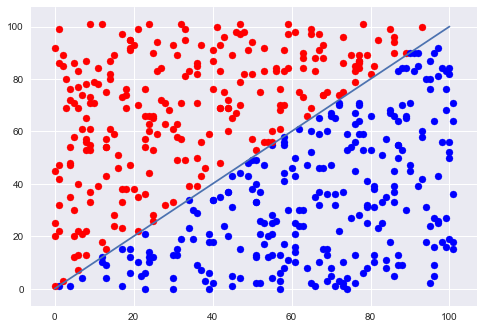

In [113]:
for i in range(500):
    x , y = randint(0,101) , randint(0,101)
    train_data.append([x,y])
    if y > f(x):
        train_label.append(1)
        plt.scatter(x=[x],y=[y],c='red')
    else:
        train_label.append(0)
        plt.scatter(x=[x],y=[y],c='blue')

plt.plot(line_x,line_y)

In [114]:
train_data = np.array(train_data).reshape(-1,2)
train_label = np.array(train_label)
plt.show()

In [115]:
print(train_data)
print(train_label)

[[ 61  25]
 [ 79  31]
 [  6  22]
 [ 13  75]
 [ 21  99]
 [ 39  18]
 [ 85  99]
 [ 67  46]
 [ 51  40]
 [ 19  95]
 [ 96   5]
 [ 47  97]
 [ 46  98]
 [ 42  35]
 [ 19  15]
 [ 40  76]
 [ 47   4]
 [ 42  83]
 [ 58  91]
 [ 21  35]
 [ 36  82]
 [ 77  70]
 [  7  21]
 [ 13  57]
 [ 42  69]
 [ 54  20]
 [ 95  76]
 [ 62  75]
 [ 23  57]
 [ 45  43]
 [ 17  15]
 [  7   4]
 [ 79  41]
 [ 74  53]
 [  6  69]
 [ 13  15]
 [ 97  26]
 [ 92  85]
 [ 98  18]
 [ 86  94]
 [  5  86]
 [ 49  48]
 [ 25  12]
 [ 76   2]
 [ 14  80]
 [  1  86]
 [ 37  43]
 [ 30  93]
 [ 23   0]
 [ 57  70]
 [ 49  43]
 [ 47  70]
 [ 72  70]
 [  4  72]
 [ 29  68]
 [ 21  22]
 [ 58  58]
 [ 69   3]
 [ 32  19]
 [ 20  93]
 [ 87  55]
 [ 23  54]
 [ 86   5]
 [ 92  39]
 [ 85  68]
 [ 58   8]
 [ 76  63]
 [ 69  15]
 [ 67  65]
 [ 15  89]
 [  0  20]
 [ 44  72]
 [ 99  76]
 [ 86  33]
 [ 37   7]
 [  8  22]
 [ 71   1]
 [ 89  65]
 [ 75  54]
 [ 66  35]
 [ 63  84]
 [ 76  85]
 [ 26  59]
 [ 80  82]
 [ 44  20]
 [ 31  15]
 [ 24  10]
 [ 79  32]
 [ 55   4]
 [ 56  84]
 [ 64  66]

# Creating and training model

In [116]:
layers = [
    Dense(units=16,input_shape=(2,),activation='sigmoid'),
    Dense(units=32,activation='sigmoid'),
    Dense(units=2,activation='softmax')
]

In [117]:
model = Sequential(layers)

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [120]:
model.fit(x=train_data,
          y=train_label,
          batch_size=10,
          epochs=100,
          shuffle=True,
          verbose=0, #for output message
          validation_split=0.1
)

# Creating test data set

In [121]:
test_data = []
test_label = []

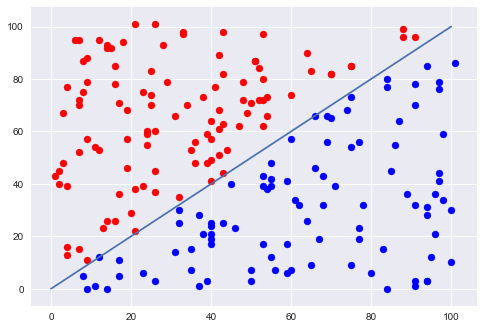

In [123]:
for i in range(200):
    x , y = randint(0,101) , randint(0,101)
    test_data.append([x,y])
    if y > f(x):
        test_label.append(1)
        plt.scatter(x=[x],y=[y],c='red')
    else:
        test_label.append(0)
        plt.scatter(x=[x],y=[y],c='blue')

plt.plot(line_x,line_y)

In [124]:
test_label = np.array(test_label)
test_data = np.array(test_data).reshape(-1,2)

# Making prediction

In [125]:
predictions = model.predict(x=test_data,batch_size=10,verbose=0)

In [126]:
predictions

array([[0.01188104, 0.98811895],
       [0.25569478, 0.74430525],
       [0.01105546, 0.98894453],
       [0.99177516, 0.00822482],
       [0.82760364, 0.17239635],
       [0.9923847 , 0.00761529],
       [0.9876281 , 0.01237183],
       [0.00924226, 0.9907577 ],
       [0.00844605, 0.99155396],
       [0.97613055, 0.02386945],
       [0.9931532 , 0.00684681],
       [0.00913941, 0.9908606 ],
       [0.99308866, 0.00691132],
       [0.9854453 , 0.01455469],
       [0.20233554, 0.79766446],
       [0.00945877, 0.99054116],
       [0.00927011, 0.99072987],
       [0.00897619, 0.9910238 ],
       [0.02037263, 0.9796274 ],
       [0.60999733, 0.39000264],
       [0.02739944, 0.9726006 ],
       [0.9887093 , 0.01129076],
       [0.01040954, 0.98959047],
       [0.99317896, 0.00682102],
       [0.9929924 , 0.00700764],
       [0.00889264, 0.9911074 ],
       [0.00922979, 0.9907703 ],
       [0.01064304, 0.98935694],
       [0.03119746, 0.9688025 ],
       [0.00829327, 0.9917067 ],
       [0.

In [127]:
rounded_predictions = np.argmax(predictions,axis=-1)
rounded_predictions

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1], d

In [128]:
test_label

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# Ploting a confusion matrix

In [130]:
# Code for this function is taken from scikit-learn website
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [131]:
cm = confusion_matrix(y_true=test_label,y_pred=rounded_predictions)

Confusion matrix, without normalization
[[132   0]
 [  0 168]]


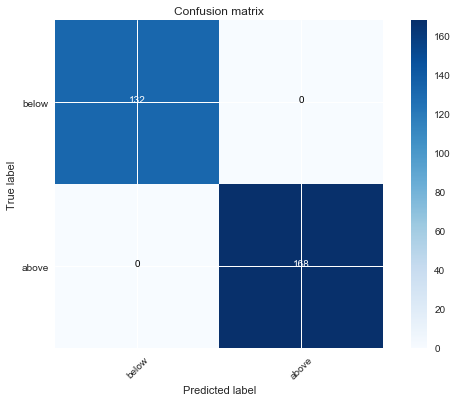

In [132]:
plot_confusion_matrix(cm=cm,classes=categories)

# Saving model

In [137]:
model.save('/models/point-line.h5')